POST vs. GET methods

- two HTTP request methods commonly used for a request-response between a client and a server
- GET: query string sent in the URL
- POST: query string sent in the HTTP message body

Other differences

- POST requests are never cached
- POST requests do not remain in the browser history
- POST requests cannot be bookmarked
- POST requests have no restrictions on data length

### Instagram API

Go here to register your application - http://instagram.com/developer/
We need to generate an Oauth token and use the client_id, client_secret when making calls to the IG API.

We'll be using a python wrapper (makes things much simpler) which you should intall by running the following
command in your remote machine:


pip install python-instagram


Full documentation of the python library here: https://github.com/Instagram/python-instagram

In [1]:
#client_id = ''
#client_secret = ''

client_id = '0db0c30814c14ac48a58c8e27a7b4a5a'
client_secret = '8681192578424d78aea183f1bf05f465'

from instagram.client import InstagramAPI

api = InstagramAPI(client_id=client_id, client_secret=client_secret)

### Instagram Tag Count

In [2]:
# get ig tag info -> how many IG posts have the given hashtag
used_tag = 'itpnyu'
num_media_tag = api.tag(used_tag).media_count
print num_media_tag

107


In [3]:
# get ig tag info
used_tag = 'GOPdebate'
num_media_tag = api.tag(used_tag).media_count
print num_media_tag

24851


In [8]:
# get ig tag info
used_tag = 'IStandWithAhmed'
num_media_tag = api.tag(used_tag).media_count
print num_media_tag

35190


In [10]:
# get ig tag info
used_tag = 'BlackLivesMatter'
num_media_tag = api.tag(used_tag).media_count
print num_media_tag

1173102


In [11]:
# get ig tag info
used_tag = 'PopeInNYC'
num_media_tag = api.tag(used_tag).media_count
print num_media_tag

4554


### Instagram Media

In [12]:
# get ig media based on tag

max_tag_id = 0
media_per_query = 33
media, _next = api.tag_recent_media(media_per_query, max_tag_id, used_tag)

In [13]:
print media

[Media: 1081922764966144557_1974288529, Media: 1081922750519248105_483496856, Media: 1081922628407851078_9538389, Media: 1081922485616259301_1197167699, Media: 1081922440041182186_226132923, Media: 1081922317307752027_40438210, Media: 1081922257060656414_365523100, Media: 1081922041967484367_6072246, Media: 1081922034106377918_178276288, Media: 1081921799133660362_483496856, Media: 1081921751890945399_1081208736, Media: 1081921684891745267_189249333, Media: 1081921594978848938_1288540627, Media: 1081921534322237942_31537007, Media: 1081921433820262134_2150913898, Media: 1081921124263812810_1082138862, Media: 1081921101162670576_235284921, Media: 1081920982680270424_1995398260, Media: 1081920950242083441_314568807, Media: 1081920888057041898_23833523, Media: 1081920830059199115_320959493, Media: 1081920823876106993_2338821, Media: 1081920672634414261_225145424, Media: 1081920611895164011_1532808022, Media: 1081920600394391825_1003138031, Media: 1081920536876599664_670768761, Media: 1081

In [14]:
print len(media)

33


In [15]:
m = media[0]
m

Media: 1081922764966144557_1974288529

In [16]:
# object of type: IG media

type(m)

instagram.models.Media

In [17]:
# returns a list of valid attributes for the given object -> IG media object / class

dir(m)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'caption',
 'comment_count',
 'comments',
 'created_time',
 'filter',
 'get_low_resolution_url',
 'get_standard_resolution_url',
 'get_thumbnail_url',
 'id',
 'images',
 'like_count',
 'likes',
 'link',
 'object_from_dictionary',
 'tags',
 'type',
 'user',
 'users_in_photo',
 'videos']

In [18]:
print m.link
print m.tags
print m.likes

https://instagram.com/p/8DwwXANyot/
[Tag: globalgoals, Tag: unga, Tag: 2030now, Tag: popeinnyc, Tag: repost]
[]


In [20]:
# let's save all media items into an array called 'all_media'

all_media = []

for m in media:
    print m.created_time
    print m.id
    print m.user
    print m.link
    print ''
    all_media.append(m)

2015-09-25 15:34:25
1081922764966144557_1974288529
User: unwomen_unitedstates
https://instagram.com/p/8DwwXANyot/

2015-09-25 15:34:24
1081922750519248105_483496856
User: washarchdiocese
https://instagram.com/p/8DwwJjHQTp/

2015-09-25 15:34:09
1081922628407851078_9538389
User: nanneruba
https://instagram.com/p/8DwuX0tPhG/

2015-09-25 15:33:52
1081922485616259301_1197167699
User: anjalitvak
https://instagram.com/p/8DwsS1qjDl/

2015-09-25 15:33:47
1081922440041182186_226132923
User: massibru
https://instagram.com/p/8DwroZLbPq/

2015-09-25 15:33:32
1081922317307752027_40438210
User: danmannarinotv
https://instagram.com/p/8Dwp2Fsi5b/

2015-09-25 15:33:25
1081922257060656414_365523100
User: stpatrickscathedral
https://instagram.com/p/8Dwo9-sHUe/

2015-09-25 15:32:59
1081922041967484367_6072246
User: americanair
https://instagram.com/p/8Dwl1qIx3P/

2015-09-25 15:32:58
1081922034106377918_178276288
User: aishabickford
https://instagram.com/p/8DwluVlCa-/

2015-09-25 15:32:30
108192179913366036

In [21]:
# this item helps us paginate through the IG media results

print _next

https://api.instagram.com/v1/tags/popeinnyc/media/recent?count=33&sig=ea1be6326ecebbacd0f0fe5c0ad7bba20c4c867731d20f0f700c9352b364e974&client_id=0db0c30814c14ac48a58c8e27a7b4a5a&max_tag_id=1081919935706299744


In [ ]:
# one way to parse data from the '_next_' object

from urlparse import urlparse

parsed = urlparse(next_)
print parsed
print ''
print parsed.query

In [ ]:
# splitting the query portion of the parsed URL by '&' character

parsed.query.split('&')

In [ ]:
# now splitting by the '=' character

[x.split('=') for x in parsed.query.split('&')]

In [ ]:
# creating a dictionary 

print {a:b for a,b in [x.split('=') for x in parsed.query.split('&')]}

In [ ]:
# lets make a function out of this -> parse out the max_tag_id parameter

def extract_max_tag_id(txt):
    parsed = urlparse(txt)
    params = {a:b for a,b in [x.split('=') for x in parsed.query.split('&')]}
    return params['max_tag_id']


In [22]:
max_tag_id = 0
media_per_query = 33
MAX_ITEMS = 10000

all_media, next_ = api.tag_recent_media(media_per_query, max_tag_id, used_tag)

while next_:
    more_media, next_ = api.tag_recent_media(count=media_per_query, tag_name=used_tag, with_next_url=next_)
    all_media.extend(more_media)
        
    print len(all_media)
    if len(all_media)>MAX_ITEMS:
        break

66
99
132
165
198
231
264
297
330
363
396
429
462
495
528
561
594
627
660
693
726
759
792
825
858
891
924
957
990
1023
1056
1089
1122
1155
1188
1221
1254
1287
1320
1353
1386
1419
1452
1485
1518
1551
1584
1617
1650
1683
1716
1749
1782
1815
1848
1881
1914
1947
1980
2013
2046
2079
2112
2145
2178
2211
2244
2277
2310
2343
2376
2409
2442
2475
2508
2541
2574
2607
2640
2673
2706
2739
2772
2805
2838
2871
2904
2937
2970
3003
3036
3069
3102
3135
3168
3201
3234
3267
3300
3333
3366
3399
3432
3465
3498
3531
3564
3576


In [ ]:
len(all_media)

In [23]:
# save our data in pickled format (this is in case our notebook crashes __gasp__ - so that we don't ahve to grab it again)

import pickle
path = '/class/itpmssd/datasets/'

pickle.dump(all_media, open(path+'%s_ig.p' % used_tag,'wb'))

In [ ]:
import pickle
path = '/class/itpmssd/datasets/'

all_media = pickle.load(open(path+'%s_ig.p' % used_tag,'rb'))

### Let's look at our data

In [24]:
# Number of unique users

users = set([m.user.username for m in all_media])
len(users)

2507

In [25]:
# Show ten most liked IG posts

for m in sorted(all_media, key=lambda x: -x.like_count)[:10]:
    print m.like_count
    print m.caption
    print m.link, '\n'

13490
Comment: todayshow said "Pope Francis's visit is bringing so much joy to so many people! #PopeinUS #PopeInDC #PopeinNYC #pope #pontifex (photos via @gettyimages)"
https://instagram.com/p/8CHENvwLTF/ 

11089
Comment: nytimes said "#PopeFrancis smiled and waved as the #popemobile headed for @stpatrickscathedral this evening during a short procession down #FifthAvenue. As the #pope (@newsva) arrived, only those closest to the sidewalk got a clear view. But that didn’t stop people from trying to capture the moment on cellphones raised high above the crowd. The pope is leading an evening prayer service before calling it a night in the city that never sleeps. Photo by @nytchangster, one of a number of @nytimes photographers covering the #popeinnyc. Follow @bengiville and @samuelhodgson to see more photos from the papal visit in New York today."
https://instagram.com/p/8CCZkSr2zq/ 

8540
Comment: fitness_meals said "Fo real..😂😂DOUBLE TAP IF THIS IS YOU✔✔ TAG a friend! -
-
VISIT US ON TO

In [26]:
# comments - 10 most commented on post

for m in sorted(all_media, key=lambda x: -x.comment_count)[:10]:
    print m.like_count, m.caption, m.link, '\n'

8540 Comment: fitness_meals said "Fo real..😂😂DOUBLE TAP IF THIS IS YOU✔✔ TAG a friend! -
-
VISIT US ON TOPPHYSIQUES.COM
.
Also follow:
@FoodBenefits
@FoodBenefits
.
#FITNESS_MEALS
#nationaldaughterday #confidence #popeinnyc lol #tiuretreat #tbt" https://instagram.com/p/8BxvlYpUD_/ 

5750 Comment: ps.ny said "©
You better watch out, Pope Francis is coming to town! #cookienun" https://instagram.com/p/8A4qLHCgnY/ 

11089 Comment: nytimes said "#PopeFrancis smiled and waved as the #popemobile headed for @stpatrickscathedral this evening during a short procession down #FifthAvenue. As the #pope (@newsva) arrived, only those closest to the sidewalk got a clear view. But that didn’t stop people from trying to capture the moment on cellphones raised high above the crowd. The pope is leading an evening prayer service before calling it a night in the city that never sleeps. Photo by @nytchangster, one of a number of @nytimes photographers covering the #popeinnyc. Follow @bengiville and @samuelho

In [27]:
# comments - most commented on post

for m in sorted(all_media, key=lambda x: -x.like_count)[:20]:
    print m.like_count, m.comment_count, m.link

13490 182 https://instagram.com/p/8CHENvwLTF/
11089 276 https://instagram.com/p/8CCZkSr2zq/
8540 966 https://instagram.com/p/8BxvlYpUD_/
7965 102 https://instagram.com/p/8CAcmJPSqc/
5750 360 https://instagram.com/p/8A4qLHCgnY/
5433 211 https://instagram.com/p/8B91hNRF5x/
5005 57 https://instagram.com/p/8B_0kVxwwN/
4570 30 https://instagram.com/p/8Bm8-cr207/
3936 40 https://instagram.com/p/8DipTJzDB1/
3672 31 https://instagram.com/p/7-maYqTDEq/
3583 30 https://instagram.com/p/8Dp0YrwLRO/
3323 271 https://instagram.com/p/7-N2YgDCJH/
3307 39 https://instagram.com/p/8CMON9u01X/
3188 35 https://instagram.com/p/8Cj1JBL20Q/
3066 250 https://instagram.com/p/8BT6t1jCK4/
3018 75 https://instagram.com/p/8CPBFPOg6o/
2899 42 https://instagram.com/p/8Dk4jpuBGd/
2523 21 https://instagram.com/p/8CGvYmJ2q4/
2341 22 https://instagram.com/p/8CVgUKpFmp/
2319 59 https://instagram.com/p/8DdBXsivTf/


In [28]:
# use pandas - plot over time

import pandas as pd

df = pd.DataFrame({'times':[m.created_time for m in all_media], 'users':[m.user.username for m in all_media], 'posts':[m.link for m in all_media]})

In [29]:
def make_date(d):
    d = d.replace(second=0, minute=0)
    return d

df['dt']=df[['times']].apply(lambda x: make_date(x['times']), axis=1)

In [30]:
df.set_index('dt')

,posts,times,users
dt,,,
2015-09-25 15:00:00,https://instagram.com/p/8DxchmqVCF/,2015-09-25 15:40:27,stjosemaria
2015-09-25 15:00:00,https://instagram.com/p/8DxYSRnKkN/,2015-09-25 15:39:52,lemoncece
2015-09-25 15:00:00,https://instagram.com/p/8DxXgFI54c/,2015-09-25 15:39:46,tdgc58
2015-09-25 15:00:00,https://instagram.com/p/8DxRdgTW6L/,2015-09-25 15:38:57,stevontae
2015-09-25 15:00:00,https://instagram.com/p/8DxRaFPF83/,2015-09-25 15:38:56,siobhanbonnouvrier
2015-09-25 15:00:00,https://instagram.com/p/8DxRYMJfa-/,2015-09-25 15:38:56,terlaw10
2015-09-25 15:00:00,https://instagram.com/p/8DxPm2Dgr2/,2015-09-25 15:38:41,mi.viaje.experiencia
2015-09-25 15:00:00,https://instagram.com/p/8DxM91Sq7R/,2015-09-25 15:38:20,manguititi
2015-09-25 15:00:00,https://instagram.com/p/8DxKZfv6RI/,2015-09-25 15:37:59,its_chris212


Populating the interactive namespace from numpy and matplotlib


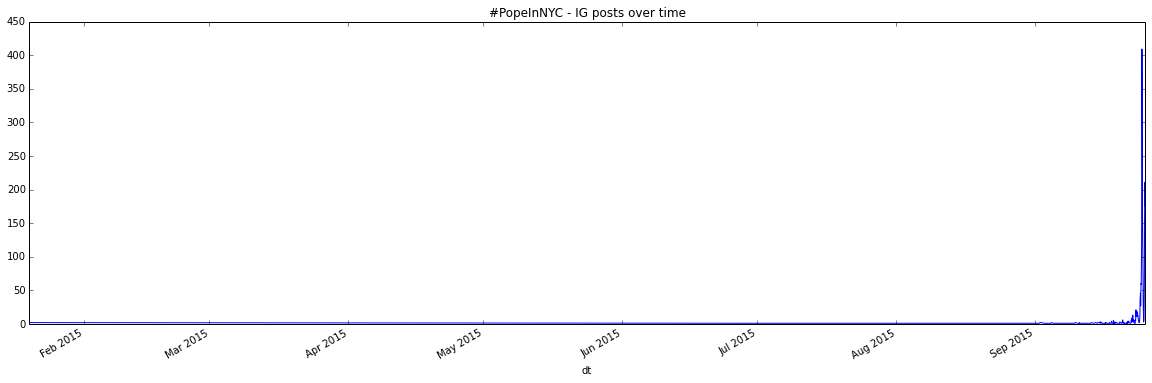

In [31]:
%pylab inline

df.groupby(df.dt).size().plot(figsize=(20,6))
title('#%s - IG posts over time' % used_tag)

In [32]:
df[-10:]

,posts,times,users,dt
3566,https://instagram.com/p/5610tsqsJM/,2015-08-03 11:22:45,gtatar2329,2015-08-03 11:00:00
3567,https://instagram.com/p/52blGtFxpz/,2015-08-01 18:16:28,mariselmoralesnyc,2015-08-01 18:00:00
3568,https://instagram.com/p/51Gr7mNC2i/,2015-08-01 05:54:40,sanagate1,2015-08-01 05:00:00
3569,https://instagram.com/p/5xqxGyKsLO/,2015-07-30 21:52:59,gtatar2329,2015-07-30 21:00:00
3570,https://instagram.com/p/5qhyu3NqBu/,2015-07-28 03:19:52,recognizemariony,2015-07-28 03:00:00
3571,https://instagram.com/p/5X97cuH0MB/,2015-07-20 22:20:10,youngfaithfulcatholics,2015-07-20 22:00:00
3572,https://instagram.com/p/4rN2k5NEmf/,2015-07-03 13:13:29,catholicmennj,2015-07-03 13:00:00
3573,https://instagram.com/p/4jzws2CmqV/,2015-06-30 16:10:48,catholic_news_service,2015-06-30 16:00:00
3574,https://instagram.com/p/yDQ9uuE_dV/,2015-01-19 21:42:41,marklevinenyc,2015-01-19 21:00:00
3575,https://instagram.com/p/yDPooSAIbF/,2015-01-19 21:31:04,nyccouncil,2015-01-19 21:00:00


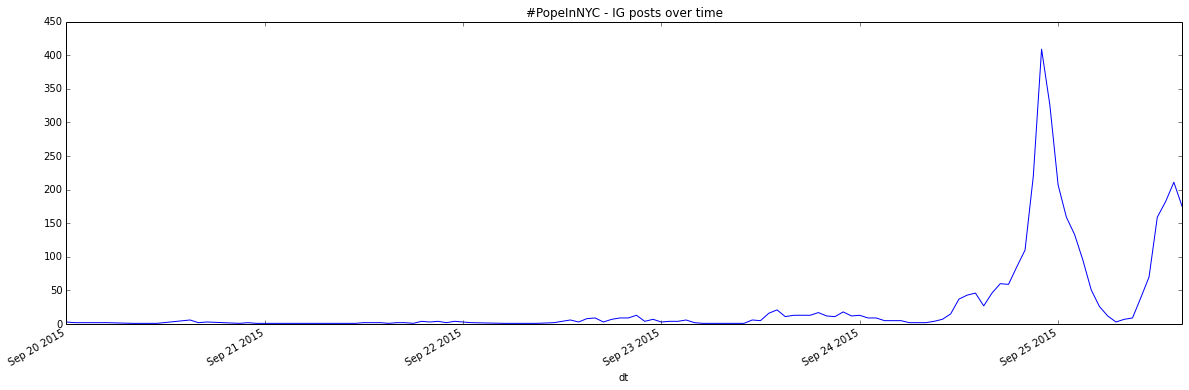

In [33]:
df.groupby(df.dt).size()['2015-09-20':].plot(figsize=(20,6))
title('#%s - IG posts over time' % used_tag)

### Scatter Plot

In [ ]:
%pylab inline

l = [m.like_count for m in all_media]
c = [m.comment_count for m in all_media]

# let's plot the relationship between these two variables

scatter(l,c,s=50,alpha=.1)
title('likes vs. comments')
ylabel('comment count')
xlabel('like count')


In [ ]:
l_log = [log(m.like_count) for m in all_media]
c_log = [log(m.comment_count) for m in all_media]

# let's plot the relationship between these two variables
rcParams['figure.figsize'] = 12,6
scatter(l_log,c_log,s=50,alpha=.1)
title('likes vs. comments')
ylabel('comment count')
xlabel('like count')


### tags

In [ ]:
from collections import Counter

#all_tags = [t.name for t in m.tags for m in all_media if hasattr(m, 'tags')]

In [ ]:
all_tags = []
for m in all_media:
    if hasattr(m, 'tags'):
        all_tags += [t.name for t in m.tags]

In [ ]:
counted_tags = Counter(all_tags)
counted_tags.most_common(40)

### location

In [ ]:
# check if the object - m - has a location attribute
location_names = set([m.location.name for m in all_media if hasattr(m, 'location')])
len(location_names)
location_names

In [ ]:
locations = {m.user.username:m.location for m in all_media if hasattr(m, 'location')}

In [ ]:
for u,loc in locations.items()[:10]:
    print u,loc

In [ ]:
user_loc = locations['laverony']

print user_loc.id
print user_loc.name
print user_loc.point.latitude
print user_loc.point.longitude

In [ ]:
# pip install geopy
# reverse geo-lookup -> for more geographic information
import json
from geopy.geocoders import Nominatim
geolocator = Nominatim()

location = geolocator.reverse((user_loc.point.latitude, user_loc.point.longitude))
print location.address
print json.dumps(location.raw, indent=1)
